In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftshift, rfft

In [188]:
fs = 1
N = 1000
t = np.linspace(0, N/fs, N, endpoint=False)
#print(t[0:10:1])

In [189]:
f = 0.1
a = 1
dc = 0
signal = a*np.sin(2*np.pi*f*t/fs) + dc

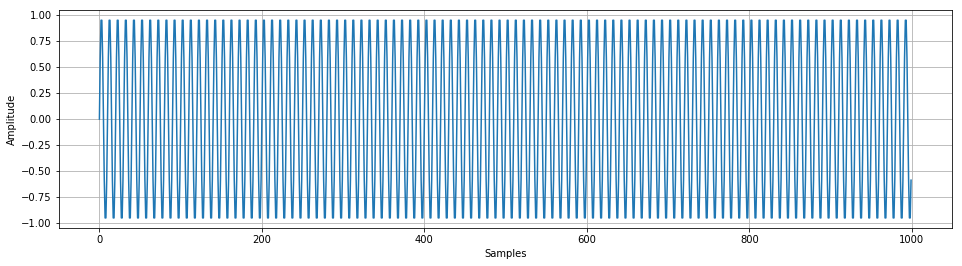

In [190]:
plt.figure(figsize=(16, 4))
#plt.subplot(1, 2, 1)
plt.plot(signal)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.grid()
plt.show()

In [191]:
fft_x = np.linspace(0, fs/(2.0), N, endpoint=False)
fft_y = rfft(signal)
fft_mag  = np.append(np.abs(fft_y[0])/N,np.abs(fft_y[1:])*2/N)
fft_power = np.square(fft_mag)
fft_power_db = 10*np.log10(fft_power)

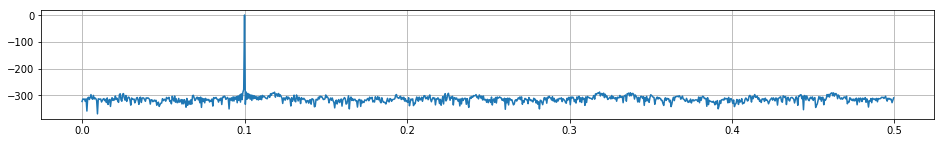

In [192]:
plt.figure(figsize=(16,2))
plt.plot(fft_x, fft_power_db)
plt.grid()
plt.show()

In [193]:
Es = 1/(N)*np.sum(np.square(np.abs(signal)))
print(Es)

0.5000000000000003


In [194]:
SNR_dB = 30
SNR_lin = np.power(10,(SNR_dB/10))
print(SNR_lin)

1000.0


In [204]:
noise = np.random.normal(0,1,N)
print(np.mean(noise))
En = 1/(N)*np.sum(np.square(np.abs(noise)))
print(10*np.log(En))
k = np.sqrt(Es/SNR_lin)
print(k)
k = np.sqrt(Es/En)
print(k)
noise = k*noise
print(np.mean(noise))

-0.009167016694124126
-0.5378977765007431
0.022360679774997904
0.7263823851880002
-0.006658759451336107


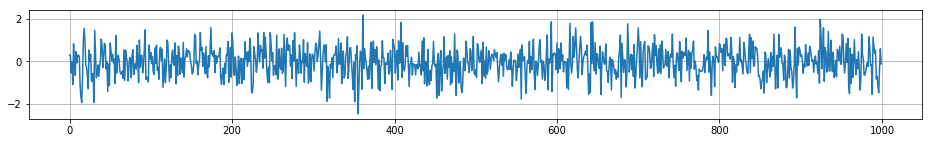

In [196]:
plt.figure(figsize=(16,2))
plt.plot(noise)
plt.grid()
plt.show()

In [197]:
fft_y = rfft(noise)
fft_mag  = np.append(np.abs(fft_y[0])/N,np.abs(fft_y[1:])*2/N)
fft_power = np.square(fft_mag)
fft_power_db = 10*np.log10(fft_power)

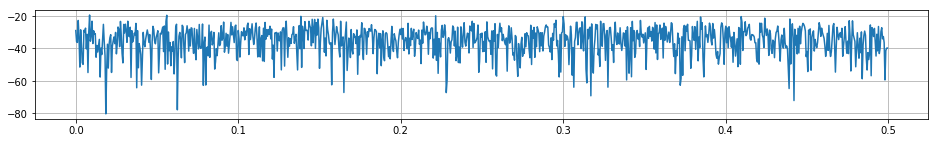

In [198]:
plt.figure(figsize=(16,2))
plt.plot(fft_x, fft_power_db)
plt.grid()
plt.show()

In [199]:
fft_y = rfft(signal+noise)
fft_mag  = np.append(np.abs(fft_y[0])/N,np.abs(fft_y[1:])*2/N)
fft_power = np.square(fft_mag)
fft_power_db = 10*np.log10(fft_power)

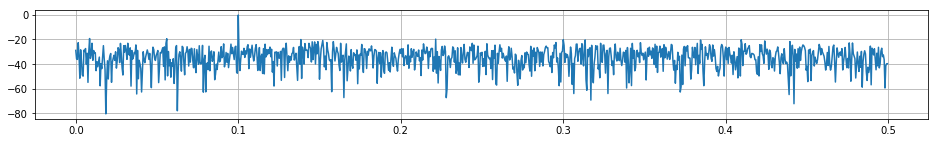

In [200]:
plt.figure(figsize=(16,2))
plt.plot(fft_x, fft_power_db)
plt.grid()
plt.show()

In [201]:
fft_gain = 10*np.log(N/2)
print(fft_gain)

62.14608098422191
